In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [4]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

print(f'Size of the dataset = {df.shape}')
df.head()

Size of the dataset = (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Let's see all the unique values for education

In [5]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Removing Emtpy values

In [6]:
df = df.drop('ID', axis=1)
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)
display(df.head())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


Converting the datetime to pandas datetime format

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [8]:
df['Dt_Customer']

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
...,...
2235,2013-06-13
2236,2014-06-10
2237,2014-01-25
2238,2014-01-24


In [9]:
columns = [column for column in df.columns]
numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 24 numerical features : ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

We have 2 categorical features : ['Education', 'Marital_Status']


Merging Teenhome and Kidhome into one
and dropping both Teen and Kid home

In [10]:
df['ChildrenHome'] = df['Kidhome'] + df['Teenhome']
df = df.drop('Teenhome', axis=1)
df = df.drop('Kidhome', axis=1)

Replacing education with equivalent unique integer values

In [11]:
'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'

education_levels = {
    "Basic" : 0,
    "2n Cycle":1,
    "Graduation":2,
    "Master":3,
    "PhD":4
}
df['Education'] = df['Education'].replace(education_levels)

/tmp/ipython-input-11-2086643211.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace(education_levels)


Getting the age of the user from Year_Birth

In [12]:
df['Age'] = 2025 - df['Year_Birth']

Recoding the Marital Status

In [13]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
marital_codes = {
    'Married':1,
    'Together':1,
    'Single':0,
    'Divorced':1,
    'Widow':0,
    'Alone':0,
    'Absurd':0,
    'YOLO':0
}
df['Marital_Status'] = df['Marital_Status'].replace(marital_codes)

/tmp/ipython-input-14-3565210741.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_Status'] = df['Marital_Status'].replace(marital_codes)


New field to store total spending of the customer

In [15]:
df['TotalSpending'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [16]:
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

Number of days the customer has been with us

In [17]:
reference_date = pd.Timestamp('2025-01-01')
df['Customer_Tenure_Days'] = (reference_date - df['Dt_Customer']).dt.days

let's remove those columns which are not required

In [18]:
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["ChildrenHome"] > 0, 1, 0)

In [19]:
columns_to_drop = ['Year_Birth']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

In [20]:
df = df[["Age","Education","Marital Status","Parental Status","ChildrenHome","Income","TotalSpending","Customer_Tenure_Days","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

In [21]:
df

,Age,Education,Marital Status,Parental Status,ChildrenHome,Income,TotalSpending,Customer_Tenure_Days,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,68,2,0,0,0,58138.0,1617,4502,58,635,88,546,172,88,88,8,10,4,3,0,7
1,71,2,0,1,2,46344.0,27,3952,38,11,1,6,2,1,6,1,1,2,2,0,5
2,60,2,1,0,0,71613.0,776,4151,26,426,49,127,111,21,42,8,2,10,1,0,4
3,41,2,1,1,1,26646.0,53,3978,26,11,4,20,10,3,5,2,0,4,2,0,6
4,44,4,1,1,1,58293.0,422,4000,94,173,43,118,46,27,15,5,3,6,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,58,2,1,1,1,61223.0,1341,4220,46,709,43,182,42,118,247,9,3,4,2,0,5
2236,79,4,1,1,3,64014.0,444,3858,56,406,0,30,0,0,8,8,2,5,7,1,7
2237,44,2,1,0,0,56981.0,1241,3994,91,908,48,217,32,12,24,2,3,13,1,1,6
2238,69,3,1,1,1,69245.0,843,3995,8,428,30,214,80,30,61,6,5,10,2,0,3


In [22]:
columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']

continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['Age', 'Income', 'TotalSpending', 'Customer_Tenure_Days', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'NumWebVisitsMonth']


In [23]:
# prompt: remove all rows that have null values

df.dropna(inplace=True)
print(f'Size of the dataset after dropping nulls = {df.shape}')

Size of the dataset after dropping nulls = (2216, 21)


/tmp/ipython-input-23-908021213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [24]:
df

,Age,Education,Marital Status,Parental Status,ChildrenHome,Income,TotalSpending,Customer_Tenure_Days,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,68,2,0,0,0,58138.0,1617,4502,58,635,88,546,172,88,88,8,10,4,3,0,7
1,71,2,0,1,2,46344.0,27,3952,38,11,1,6,2,1,6,1,1,2,2,0,5
2,60,2,1,0,0,71613.0,776,4151,26,426,49,127,111,21,42,8,2,10,1,0,4
3,41,2,1,1,1,26646.0,53,3978,26,11,4,20,10,3,5,2,0,4,2,0,6
4,44,4,1,1,1,58293.0,422,4000,94,173,43,118,46,27,15,5,3,6,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,58,2,1,1,1,61223.0,1341,4220,46,709,43,182,42,118,247,9,3,4,2,0,5
2236,79,4,1,1,3,64014.0,444,3858,56,406,0,30,0,0,8,8,2,5,7,1,7
2237,44,2,1,0,0,56981.0,1241,3994,91,908,48,217,32,12,24,2,3,13,1,1,6
2238,69,3,1,1,1,69245.0,843,3995,8,428,30,214,80,30,61,6,5,10,2,0,3


In [25]:
df = df[df["Income"] < 600000]

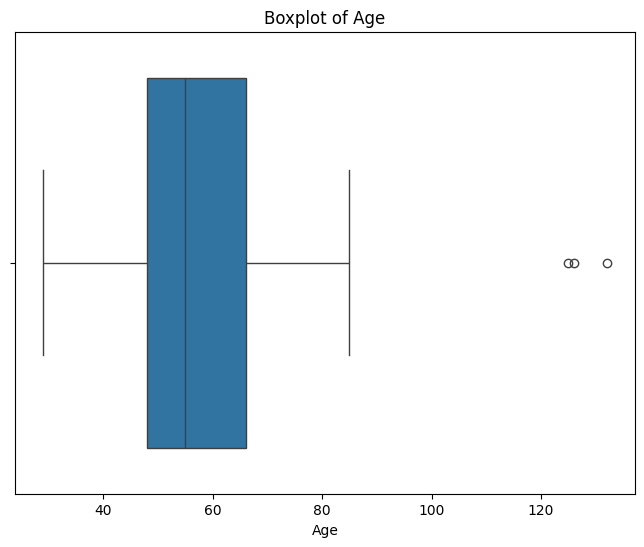

Q1 (25th percentile) for Age: 48.0
Q3 (75th percentile) for Age: 66.0
IQR for Age: 18.0
Lower bound for potential outliers in Age: 21.0
Upper bound for potential outliers in Age: 93.0

Potential outliers in Age (3):


,Age
192,125
239,132
339,126


In [28]:
# prompt: show me the graph that is suposed to show the outliers and IQR  for age specifically

import matplotlib.pyplot as plt
# Boxplot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Calculate IQR for Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile) for Age: {Q1}")
print(f"Q3 (75th percentile) for Age: {Q3}")
print(f"IQR for Age: {IQR}")

# Identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for potential outliers in Age: {lower_bound}")
print(f"Upper bound for potential outliers in Age: {upper_bound}")

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"\nPotential outliers in Age ({len(outliers)}):")
display(outliers[['Age']])


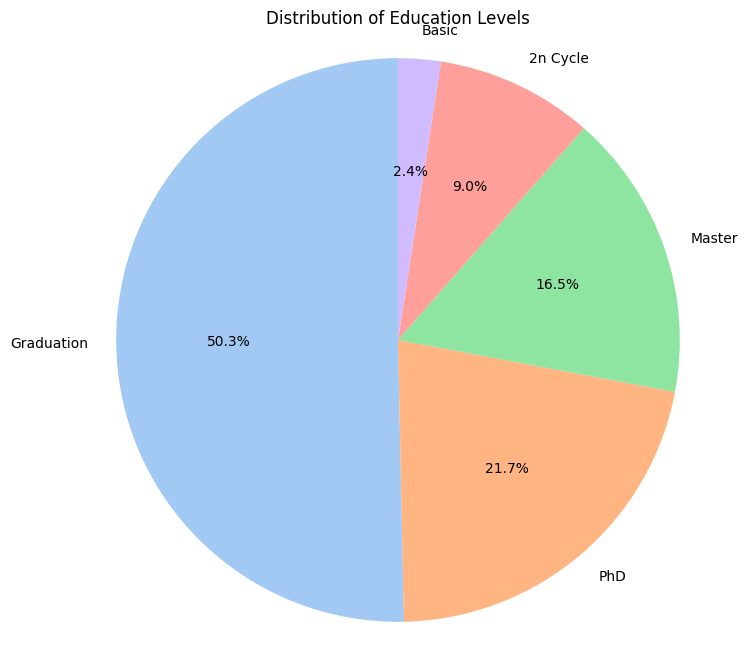

In [30]:
# prompt: create a pie chart for Education

import matplotlib.pyplot as plt
# Pie chart for Education
education_counts = df['Education'].value_counts()
education_labels = education_counts.index.map({0: "Basic", 1: "2n Cycle", 2: "Graduation", 3: "Master", 4: "PhD"})

plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Education Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()